In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch

from frnn_loader.backends.machine import MachineD3D
from frnn_loader.data.user_signals import fs07, ip, q95, neped
from frnn_loader.primitives.resamplers import resampler_last
from frnn_loader.backends.backend_txt import backend_txt
from frnn_loader.loaders.frnn_dataset import shot_dataset


#import numpy as np
import matplotlib.pyplot as plt

#import logging
#logging.basicConfig(filename="frnn_loader.log", level=logging.INFO)

/home/rkube/miniconda3/envs/frnn/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Instantiate a resampler
my_resampler = resampler_last(0.0, 2.0, 1e-3)

In [3]:
# Instantiate a file backend
my_backend_file = backend_txt("/home/rkube/datasets/frnn/signal_data_new_2021/")

In [4]:
ds = shot_dataset(184800, MachineD3D(), [fs07, q95, neped], resampler=my_resampler, backend_file=my_backend_file, download=False, dtype=torch.float32)


Loaded signal filterscope fs07: tb.shape = torch.Size([400000]), signal.shape = torch.Size([400000, 1])
Loaded signal q95 safety factor: tb.shape = torch.Size([282]), signal.shape = torch.Size([282, 1])
Loaded signal neped: tb.shape = torch.Size([891]), signal.shape = torch.Size([891, 1])
len(time_arrays):  3
len(signal_arrays):  3
      0: shape =  torch.Size([400000, 1])
      1: shape =  torch.Size([282, 1])
      2: shape =  torch.Size([891, 1])
t_min = 0.11083199828863144, t_max = 5.4252400398254395
0 filterscope fs07 torch.Size([400000]) torch.Size([400000, 1])
torch.Size([400000]) torch.Size([265720]) torch.Size([265720, 1])
1 q95 safety factor torch.Size([282]) torch.Size([282, 1])
torch.Size([282]) torch.Size([266]) torch.Size([266, 1])
2 neped torch.Size([891]) torch.Size([891, 1])
torch.Size([891]) torch.Size([891]) torch.Size([891, 1])


In [5]:
ds.tb

tensor([0.0000e+00, 1.0000e-03, 2.0000e-03,  ..., 1.9970e+00, 1.9980e+00,
        1.9990e+00])

In [6]:
ds.signal_list

[filterscope fs07, q95 safety factor, neped]

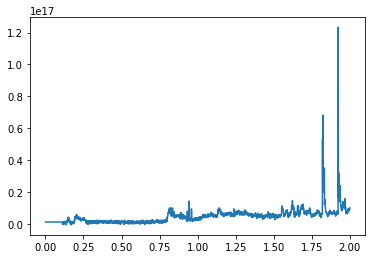

In [5]:
plt.plot(ds.tb, ds.signal_tensor[:, 0])

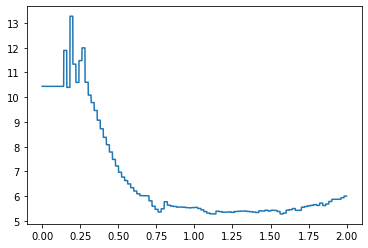

In [6]:
plt.plot(ds.tb, ds.signal_tensor[:, 1])

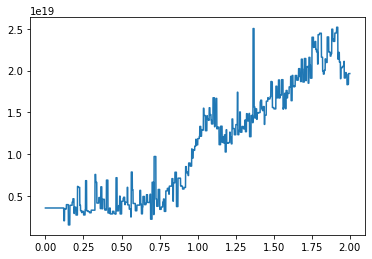

In [7]:
plt.plot(ds.tb, ds.signal_tensor[:, 2])